# КВБО-01-21 Марченко Сергей

# 1.3.1
## Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.


Euclidean distance
	1-2: 27.03701166919155
	1-3: 24.919871588754223
	1-4: 18.138357147217054
	2-3: 18.49324200890693
	2-4: 15.297058540778355
	3-4: 23.15167380558045

Euclidean squared distance
	1-2: 731.0
	1-3: 620.9999999999999
	1-4: 329.0
	2-3: 342.0
	2-4: 234.00000000000003
	3-4: 536.0

Chebyshev distance
	1-2: 19.0
	1-3: 19.0
	1-4: 13.0
	2-3: 17.0
	2-4: 13.0
	3-4: 20.0

Hamming distance
	1-2: 45.0
	1-3: 37.0
	1-4: 29.0
	2-3: 26.0
	2-4: 24.0
	3-4: 36.0


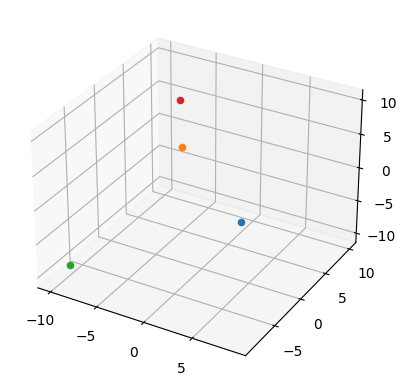

In [80]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def calculate(fn):
    for pair in combinations:
        print(f"\t{pair[0][0] + 1}-{pair[1][0] + 1}: {fn(pair)}")


rng = np.random.default_rng()
points = rng.integers(-10, 11, (4, 3))
combinations = list(itertools.combinations(enumerate(points), 2))

print("Euclidean distance")
calculate(lambda pair: np.linalg.norm(pair[0][1] - pair[1][1]))

print("\nEuclidean squared distance")
calculate(lambda pair: np.linalg.norm(pair[0][1] - pair[1][1]) ** 2)

print("\nChebyshev distance")
calculate(lambda pair: np.linalg.norm(pair[0][1] - pair[1][1], ord=np.inf))

print("\nHamming distance")
calculate(lambda pair: np.linalg.norm(pair[0][1] - pair[1][1], ord=1))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for point in points:
    ax.scatter(*point)
plt.show()

# 2.3.1
## Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте результаты.



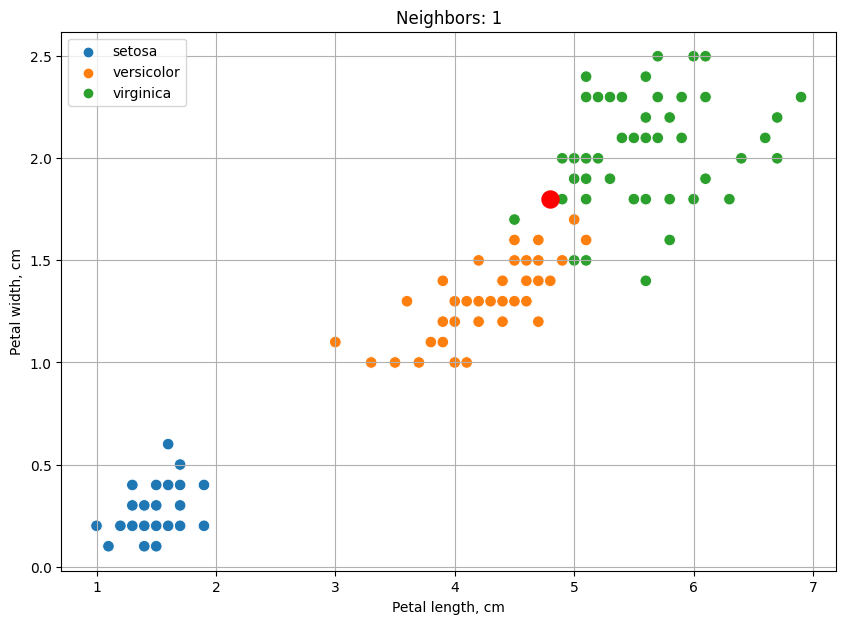

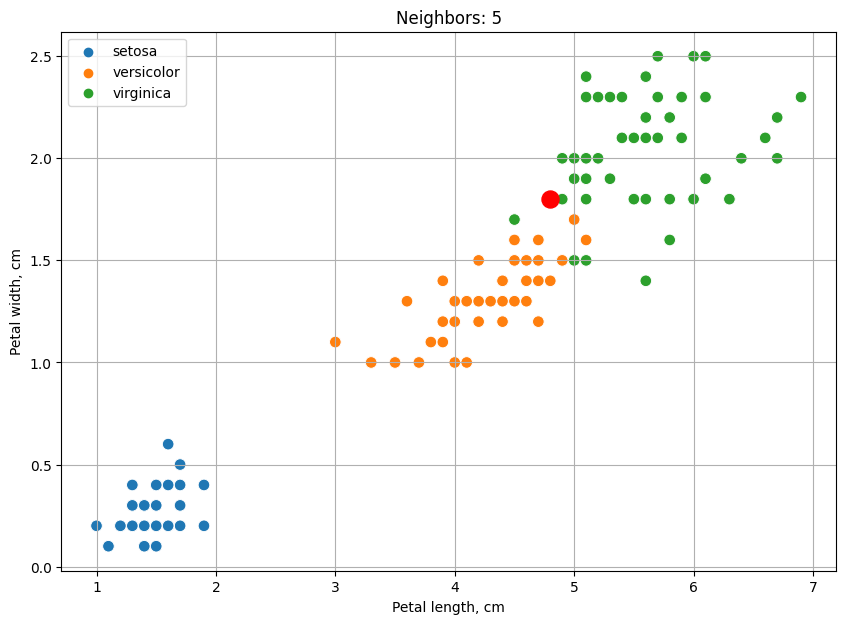

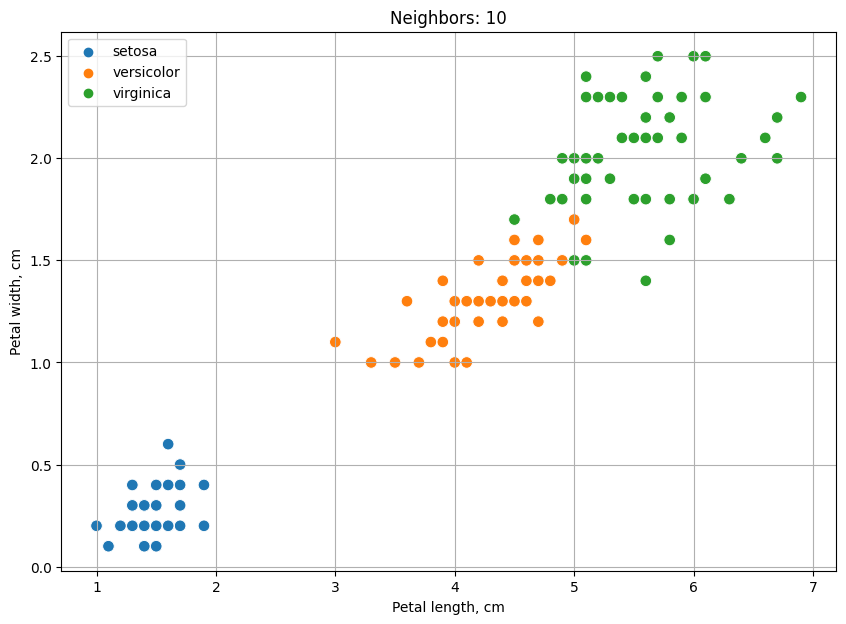

Accuracy for 10 neighbors: 1.0
Accuracy for 1 neighbors: 0.957
Accuracy for 5 neighbors: 0.957


In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

iris = sns.load_dataset('iris')

x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.15)

accuracies = []

for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', s=70)
    plt.xlabel('Petal length, cm')
    plt.ylabel('Petal width, cm')
    plt.title(f'Neighbors: {k}')
    plt.legend(loc=2)
    plt.grid()

    for i, _ in enumerate(y_test):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(x_test.iloc[i, 2], x_test.iloc[i, 3], color='red', s=150)

    accuracies.append((k, accuracy_score(y_test, y_pred)))
    plt.show()

accuracies.sort(key=lambda t: t[1], reverse=True)
for t in accuracies:
    print(f'Accuracy for {t[0]} neighbors: {t[1]:.3}')

# 3.3.2
## Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [4]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'eye_color': 2, 'skin_color': 0, 'hair_color': 0},
            {'eye_color': 1, 'skin_color': 2, 'hair_color': 1},
            {'eye_color': 0, 'skin_color': 3, 'hair_color': 2},
            {'eye_color': 2, 'skin_color': 1, 'hair_color': 4}]

dictvectorizer = DictVectorizer(sparse=False)

features = dictvectorizer.fit_transform(data_dict)
features

array([[2., 0., 0.],
       [1., 1., 2.],
       [0., 2., 3.],
       [2., 4., 1.]])